# 1. EDA
## 1.1 Class distribution analysis

In [1]:
import os
import sys

current_dir = os.path.dirname(os.path.abspath(''))
src_path = os.path.join(current_dir, 'src')
sys.path.append(src_path)

from dataloader import load_local_dataset

# Load local dataset
X, y = load_local_dataset()
# Load huggingface dataset
# X, y = load_remote_huggingface_dataset()

# View the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(X.head())


First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

   

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess the data: remove 'Time', scale 'Amount', and split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Remove 'Time' column
X_train = X_train.drop("Time", axis=1)
X_test = X_test.drop("Time", axis=1)

# Scale 'Amount' column
scaler = StandardScaler()
X_train["Amount_scaled"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount_scaled"] = scaler.transform(X_test[["Amount"]])
X_train = X_train.drop("Amount", axis=1)
X_test = X_test.drop("Amount", axis=1)

# View the first 5 rows of the preprocessed dataset
print("First 5 rows of the preprocessed dataset:")
print(X_train.head())

First 5 rows of the preprocessed dataset:
              V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
198723  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
82325  -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

              V8        V9       V10  ...       V20       V21       V22  \
265518  1.139880  1.406819 -0.157403  ... -0.134435  0.076197  0.297537   
180305  0.674782  0.045826  0.284864  ... -0.227279  0.038628  0.228197   
42664  -5.037523  0.000772 -2.009561  ...  1.280856 -2.798352  0.109526   
198723  0.010010 -1.118447  1.756121  ... -0.490642 -0.139670  0.077013   
82325  -0.113817 -0.044782 -0.558955  ... -0.275297 -0.243245 -0.173298   

             V23       V24

Sample size for each category: 
Class
0    227451
1       394
Name: count, dtype: int64


C:\Users\Quincy\AppData\Local\Temp\ipykernel_21296\2623085431.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


<Axes: xlabel='Class', ylabel='count'>

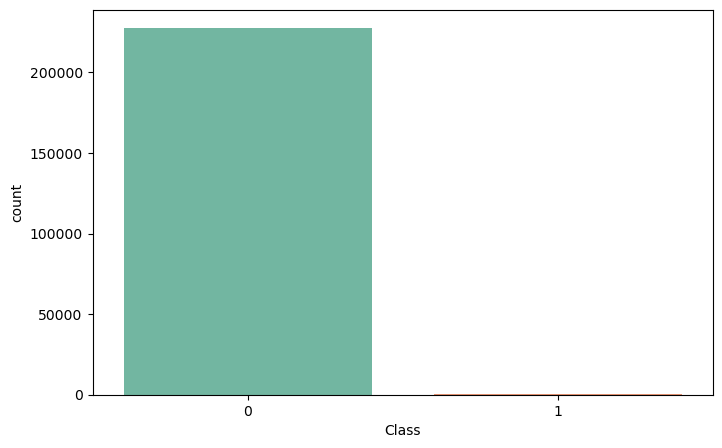

In [3]:
# Explore data features and degree of imbalance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class_counts = pd.Series(y_train).value_counts()
print("Sample size for each category: ")
print(class_counts)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')

## 2. Feature analysis

In [4]:
# Missing values in the dataset

print("Missing values in each feature:")
print(X_train.isnull().sum())

Missing values in each feature:
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount_scaled    0
dtype: int64


In [5]:
# Plot the distribution of the target variable

X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,2.278450e+05
mean,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,0.000702,-0.000389,...,-0.000999,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,-2.020811e-17
std,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,1.097351,1.086252,...,0.770806,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,1.000002e+00
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-3.516894e-01
25%,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,-0.640307,-0.535655,...,-0.211651,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,-3.291944e-01
50%,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,-0.050653,-0.093332,...,-0.062606,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,-2.639429e-01
75%,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,0.598254,0.454469,...,0.132702,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,-4.262209e-02
max,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,1.021170e+02


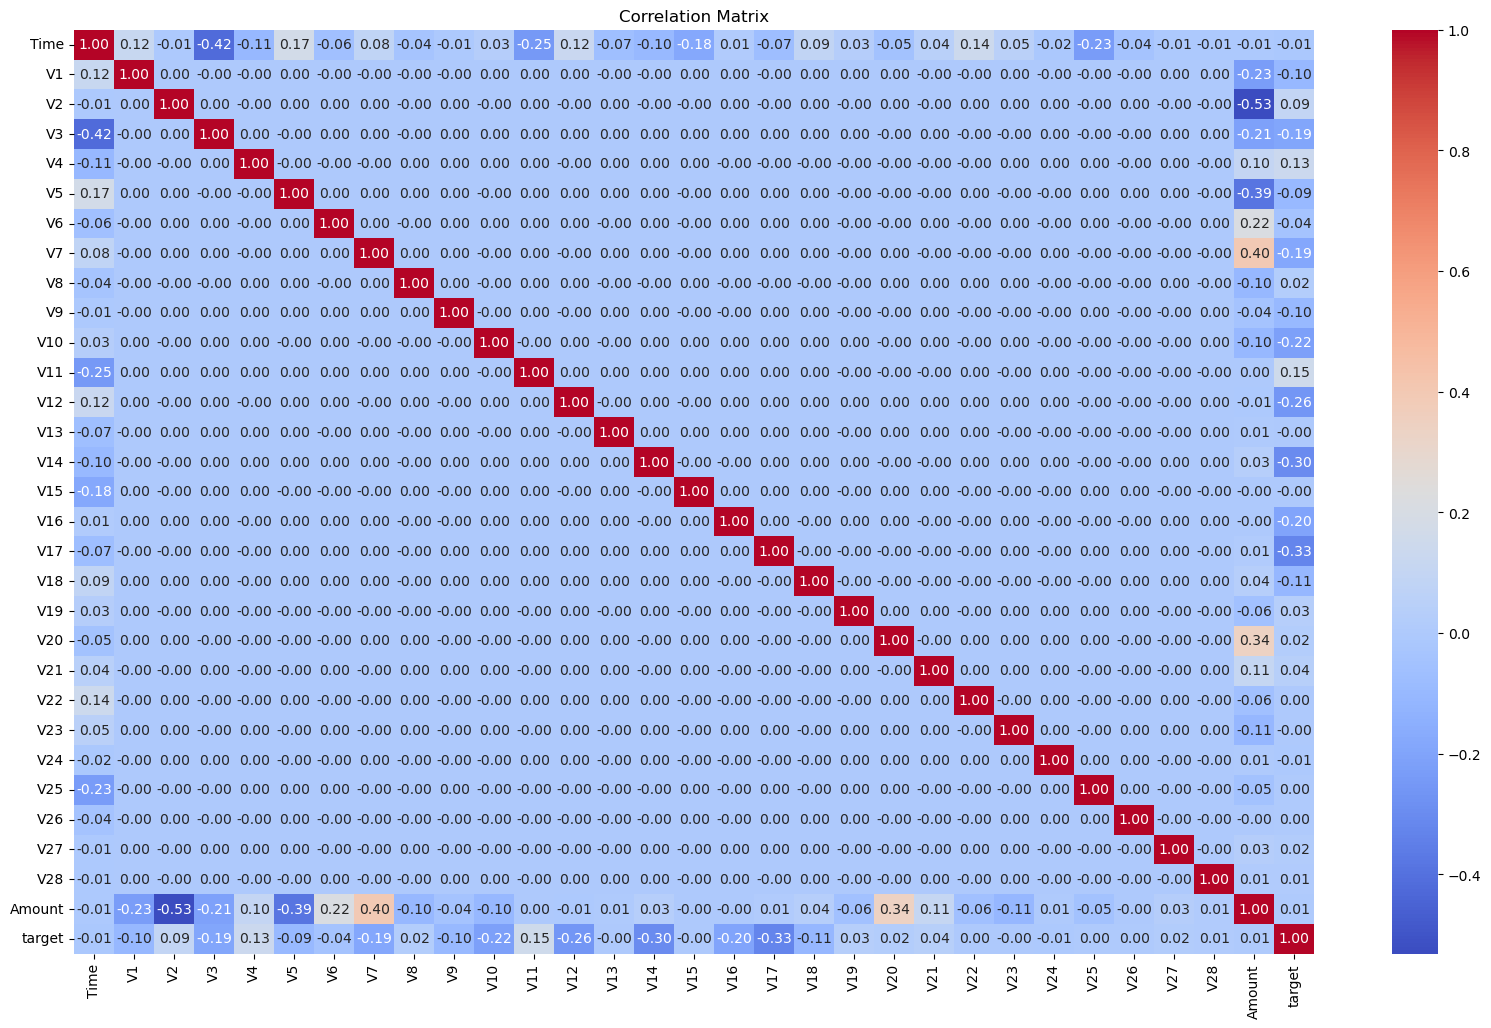

In [6]:
# correlation matrix

Xy = pd.concat([X, pd.Series(y, name='target')], axis=1)
correlation_matrix = Xy.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Baseline experiment

In [7]:
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score, average_precision_score

base_model = xgb.XGBClassifier()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

base_f1 = f1_score(y_test, y_pred_base)
base_recall = recall_score(y_test, y_pred_base)
base_pr_auc = average_precision_score(y_test, y_pred_base)

# store the metrics in a DataFrame

metrics = {
    'F1': base_f1,
    'Recall': base_recall,
    'PR_AUC': base_pr_auc
}
metrics_xgb_base = pd.DataFrame(metrics, index=[0]) 

# create a dictionary to store the metrics
metrics_dict = {}
metrics_dict['XGBoost Base'] = metrics_xgb_base

print(f"Baseline Model - F1: {base_f1}, Recall: {base_recall}, PR - AUC: {base_pr_auc}")

Baseline Model - F1: 0.8342245989304813, Recall: 0.7959183673469388, PR - AUC: 0.6978975455712193


## 4. Using imbalanced-learn

In [8]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

resamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

for name, resampler in resamplers.items():
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    print(f"{name} resampling positive class ratio: {np.mean(y_resampled)}")

    model = xgb.XGBClassifier()
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_pred)

    metrics[name] = {
        'F1': f1,
        'Recall': recall,
        'PR_AUC': pr_auc
    }
    metrics_xgb_resampled = pd.DataFrame(metrics[name], index=[0])
    metrics_dict[name] = metrics_xgb_resampled  

    print(f"{name} - F1: {f1}, Recall: {recall}, PR - AUC: {pr_auc}")

RandomOverSampler resampling positive class ratio: 0.5
RandomOverSampler - F1: 0.875, Recall: 0.8571428571428571, PR - AUC: 0.7662032246955229
SMOTE resampling positive class ratio: 0.5
SMOTE - F1: 0.8018433179723502, Recall: 0.8877551020408163, PR - AUC: 0.6492241521847619
ADASYN resampling positive class ratio: 0.5000076938464616
ADASYN - F1: 0.7579908675799086, Recall: 0.8469387755102041, PR - AUC: 0.5812213364862956


## 5. XGBoost tuning: scale_pos_weight parameter

In [9]:
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
weighted_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
weighted_model.fit(X_train, y_train)
y_pred_weighted = weighted_model.predict(X_test)

weighted_f1 = f1_score(y_test, y_pred_weighted)
weighted_recall = recall_score(y_test, y_pred_weighted)
weighted_pr_auc = average_precision_score(y_test, y_pred_weighted)

metrics_weighted = {
    'F1': weighted_f1,
    'Recall': weighted_recall,
    'PR_AUC': weighted_pr_auc
}

metrics_weighted_xgb = pd.DataFrame(metrics_weighted, index=[0])
metrics_dict['XGBoost Weighted'] = metrics_weighted_xgb

print(f"Adjusted scale_pos_weight - F1: {weighted_f1}, Recall: {weighted_recall}, PR - AUC: {weighted_pr_auc}")

Adjusted scale_pos_weight - F1: 0.8645833333333334, Recall: 0.8469387755102041, PR - AUC: 0.7480922522519337


In [10]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(estimator=xgb.XGBClassifier(), random_state=42)
bbc.fit(X_train, y_train)
y_pred_bbc = bbc.predict(X_test)

bbc_f1 = f1_score(y_test, y_pred_bbc)
bbc_recall = recall_score(y_test, y_pred_bbc)
bbc_pr_auc = average_precision_score(y_test, y_pred_bbc)

metrics_bbc = {
    'F1': bbc_f1,
    'Recall': bbc_recall,
    'PR_AUC': bbc_pr_auc
}

metrics_bbc_xgb = pd.DataFrame(metrics_bbc, index=[0])
metrics_dict['BalancedBaggingClassifier'] = metrics_bbc_xgb

print(f"BalancedBaggingClassifier - F1: {bbc_f1}, Recall: {bbc_recall}, PR - AUC: {bbc_pr_auc}")

BalancedBaggingClassifier - F1: 0.16172506738544473, Recall: 0.9183673469387755, PR - AUC: 0.08157203192015466


In [11]:

from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedBaggingClassifier

param_grid = {
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5, 7],
    'n_estimators': [10, 20, 30]
}

bbc = BalancedBaggingClassifier(estimator=xgb.XGBClassifier(), random_state=42)
grid_search = GridSearchCV(bbc, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_bbc = grid_search.best_estimator_
best_bbc.fit(X_train, y_train)
y_pred_best_bbc = best_bbc.predict(X_test)

best_bbc_f1 = f1_score(y_test, y_pred_best_bbc)
best_bbc_recall = recall_score(y_test, y_pred_best_bbc)
best_bbc_pr_auc = average_precision_score(y_test, y_pred_best_bbc)

metrics_best_bbc = {
    'F1': best_bbc_f1,
    'Recall': best_bbc_recall,
    'PR_AUC': best_bbc_pr_auc
}

metrics_best_bbc_xgb = pd.DataFrame(metrics_best_bbc, index=[0])
metrics_dict['Best BalancedBaggingClassifier'] = metrics_best_bbc_xgb


In [12]:

metrics_df = pd.concat(metrics_dict.values(), axis=0)

metrics_df.index = metrics_dict.keys()

print("Indicator data of all models:")
print(metrics_df)


Indicator data of all models:
                                      F1    Recall    PR_AUC
XGBoost Base                    0.834225  0.795918  0.697898
RandomOverSampler               0.875000  0.857143  0.766203
SMOTE                           0.801843  0.887755  0.649224
ADASYN                          0.757991  0.846939  0.581221
XGBoost Weighted                0.864583  0.846939  0.748092
BalancedBaggingClassifier       0.161725  0.918367  0.081572
Best BalancedBaggingClassifier  0.161818  0.908163  0.080823
